<center><h1>Predictive Modeling</h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the new data
df = pd.read_csv("new_data_collisions.csv")
df.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,1,1307,0,2,0,2,0,0,2,1,4,8,5,10
1,1,2,52200,0,1,9,2,0,0,2,4,6,8,2,11
2,1,3,26700,0,1,5,4,0,0,3,4,4,0,5,32
3,1,4,1144,0,1,4,3,0,0,3,4,1,0,5,23
4,2,5,17700,0,2,0,2,0,0,2,1,6,8,5,10


In [3]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, jaccard_similarity_score, confusion_matrix, classification_report

In [4]:
df.shape

(194673, 15)

In [12]:
#split the data

X = df[['OBJECTID','INCKEY','STATUS','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(155738, 13)
(155738,)

Test set size
(38935, 13)
(38935,)


<h2>Modeling, Prediction and Evaluation</h2>

<h3>K Nearest Neighbors</h3>

In [14]:
k=17
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [15]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [16]:
print('Score:',accuracy_score(knn_pred, y_test))
print('F1-Score:',f1_score(knn_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(knn_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, knn_pred))

Score: 0.6867856684217285
F1-Score: 0.8104688932751037
Jaccard Score: 0.6867856684217285

Confusion Martix:
[[26074  1285]
 [10910   666]]

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.95      0.81     27359
           2       0.34      0.06      0.10     11576

   micro avg       0.69      0.69      0.69     38935
   macro avg       0.52      0.51      0.45     38935
weighted avg       0.60      0.69      0.60     38935



In [17]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred=knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, pred)

    
    std_acc[n-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])

mean_acc

array([0.59196096, 0.66955182, 0.62211378, 0.67194041, 0.64124823,
       0.67769359, 0.65319122, 0.68103249, 0.66477462, 0.6865802 ,
       0.67358418, 0.68801849, 0.67915757, 0.69053551, 0.68370361,
       0.69382304, 0.68678567, 0.69590343, 0.69084371])

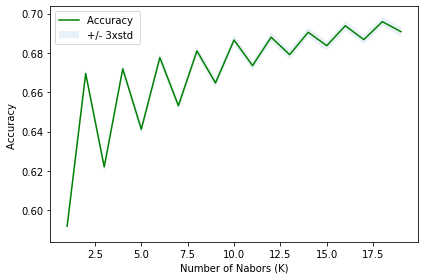

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

<h3>Decision Tree</h3>

In [19]:
tree = DecisionTreeClassifier(criterion="gini", max_depth = 4).fit(X_train, y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
tree_pred = tree.predict(X_test)
tree_pred

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
print('Score:',accuracy_score(tree_pred, y_test))
print('F1-Score:',f1_score(tree_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(tree_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, tree_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, tree_pred))

Score: 0.7506613586747143
F1-Score: 0.84807036213966
Jaccard Score: 0.7506613586747143

Confusion Martix:
[[27095   264]
 [ 9444  2132]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27359
           2       0.89      0.18      0.31     11576

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.82      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



In [ ]:
tree_pred = tree.predict(X_test)
tree_pred

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

<h3>Logistic Regression</h3>

In [ ]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
lr_pred = lr.predict(X_test)
lr_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
print('Score:',accuracy_score(lr_pred, y_test))
print('F1-Score:',f1_score(lr_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(lr_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, lr_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, lr_pred))

Score: 0.6984718119943496
F1-Score: 0.8216997752262925
Jaccard Score: 0.6984718119943496

Confusion Martix:
[[27052   307]
 [11433   143]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.99      0.82     27359
           2       0.32      0.01      0.02     11576

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.51      0.50      0.42     38935
weighted avg       0.59      0.70      0.58     38935



<h3>Navie Bayes</h3>

In [ ]:
nb = GaussianNB(priors=None, var_smoothing=1e-09).fit(X_train,y_train)
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_pred = nb.predict(X_test)
nb_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
print('Score:',accuracy_score(nb_pred, y_test))
print('F1-Score:',f1_score(nb_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(nb_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, nb_pred))

<h3>Random Forest</h3>

In [ ]:
rf = RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
rf

In [ ]:
rf_pred = rf.predict(X_test)
rf_pred

In [ ]:
print('Score:',accuracy_score(rf_pred, y_test))
print('F1-Score:',f1_score(rf_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(rf_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, rf_pred))

Finally, get a good result for all classification algorithms. the best classifier of this problem is **k nearest neighbour**. It's get  best score and more true positive values.

## Result & Discussion 

Our analysis shows that although there is a collisions of all years. I find the what happend after collision based on that corresponds to the severity of the collision. It provide <br>
• 3 — fatality<br>
• 2b — serious injury<br> 
• 2 — injury <br>
• 1 — prop damage<br> 
• 0 — unknown 

Thats major important matter to the collisions. so we tried to predict what type of injury based on weather condition, road condition, etc... 

## Conclusion

A traffic collision, also called a motor vehicle collision, car accident, or car crash, occurs when a vehicle collides with another vehicle, pedestrian, animal, road debris, or other stationary obstruction, such as a tree, pole or building. Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved.

Purpose of this project was to identify the **type of severity** to the during of collision. The major important of predicting is Weather condition, Road condition, Address of collision, How many peoples are involved, How many vehicles are present and Which type of vehicles. That are hepls to predicte to what type of injury or disability in collision.

Final discussion, we get optimal solution to the Collisions of all year in further analysis.